# Flight Price Dataset

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [213]:
train=pd.read_excel('flight.xlsx')

In [214]:
test=pd.read_excel('flight_test.xlsx')

In [215]:
df_train=pd.DataFrame(train)

In [216]:
df_test=pd.DataFrame(test)

In [217]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [218]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [219]:
df_train.shape,df_test.shape

((10683, 11), (2671, 10))

In [220]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [221]:
df_train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [222]:
df_train.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [223]:
df_train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [224]:
df_train.Duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [225]:
df_train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [226]:
df_train.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [227]:
df_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# checking null values

In [228]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [229]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

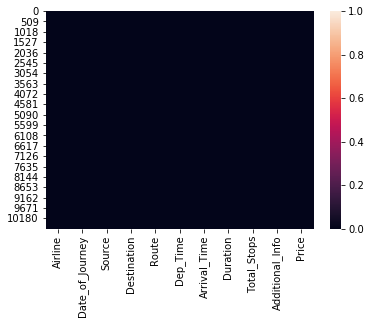

In [230]:
sns.heatmap(df_train.isnull())

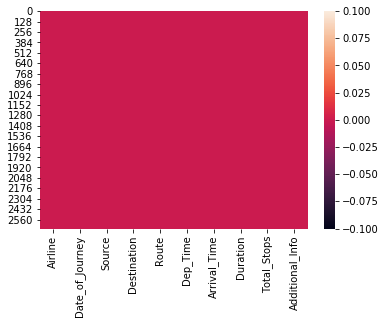

In [231]:
sns.heatmap(df_test.isnull())

There is no null value in this dataset

In [232]:
#seperating into date and time column
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'])
df_train['Month'] = df_train['Date_of_Journey'].dt.month
df_train['Day'] = df_train['Date_of_Journey'].dt.day

In [233]:
#seperating into date and time column
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'])
df_test['Month'] = df_test['Date_of_Journey'].dt.month
df_test['Day'] = df_test['Date_of_Journey'].dt.day

In [234]:
df_train.Month.unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

In [235]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24


In [236]:
#droping the original column
df_train.drop('Date_of_Journey',axis=1,inplace=True)

In [237]:
#droping the original column
df_test.drop('Date_of_Journey',axis=1,inplace=True)

In [238]:
#seperating in hour and minute
df_train['Dep_Time'] = pd.to_datetime(df_train['Dep_Time'])
df_train['Dep_hours'] = df_train['Dep_Time'].dt.hour
df_train['Dep_minutes'] = df_train['Dep_Time'].dt.minute

In [239]:
#seperating in hour and minute
df_test['Dep_Time'] = pd.to_datetime(df_test['Dep_Time'])
df_test['Dep_hours'] = df_test['Dep_Time'].dt.hour
df_test['Dep_minutes'] = df_test['Dep_Time'].dt.minute

In [240]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hours,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2020-10-08 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-10-08 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2020-10-08 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2020-10-08 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2020-10-08 16:50:00,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [241]:
#seperating in hour and minute
df_train['Arrival_Time'] = pd.to_datetime(df_train['Arrival_Time'])
df_train['Arrival_hour'] = df_train['Arrival_Time'].dt.hour
df_train['Arrival_minute'] = df_train['Arrival_Time'].dt.minute

In [242]:
#seperating in hour and minute
df_test['Arrival_Time'] = pd.to_datetime(df_test['Arrival_Time'])
df_test['Arrival_hour'] = df_test['Arrival_Time'].dt.hour
df_test['Arrival_minute'] = df_test['Arrival_Time'].dt.minute

In [243]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Dep_hours,Dep_minutes,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2020-10-08 17:30:00,2020-06-07 04:25:00,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2020-10-08 06:20:00,2020-10-08 10:20:00,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2020-10-08 19:15:00,2020-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2020-10-08 08:00:00,2020-10-08 21:00:00,13h,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2020-10-08 23:55:00,2020-06-25 02:45:00,2h 50m,non-stop,No info,6,24,23,55,2,45


In [244]:
#droping the original columns
df_train.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [245]:
#droping the original columns
df_test.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [246]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Month,Day,Dep_hours,Dep_minutes,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6,24,23,55,2,45


In [247]:
df_train.drop('Route',axis=1,inplace=True)

In [248]:
df_test.drop('Route',axis=1,inplace=True)

In [249]:
df_train.drop('Duration',axis=1,inplace=True)

In [250]:
df_test.drop('Duration',axis=1,inplace=True)

In [251]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day,Dep_hours,Dep_minutes,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35


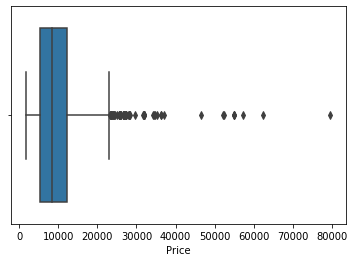

In [252]:
sns.boxplot(df_train.Price)

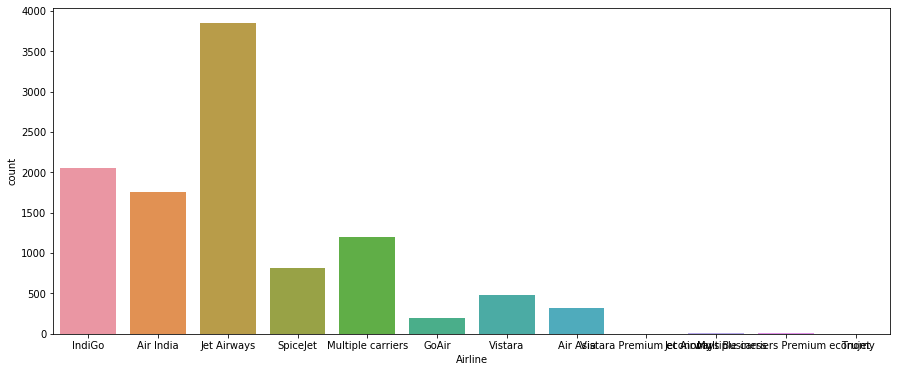

In [253]:
plt.figure(figsize=(15,6))
sns.countplot(df_train.Airline)

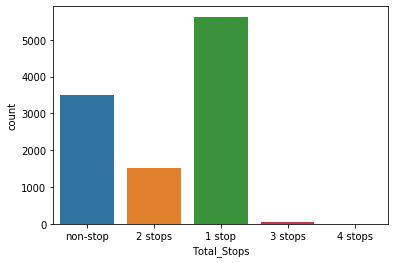

In [254]:
sns.countplot(df_train.Total_Stops)

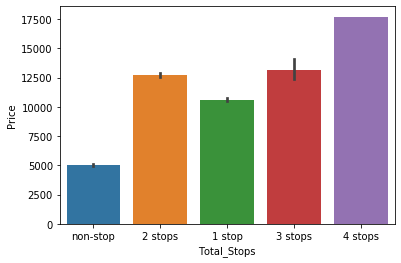

In [255]:
sns.barplot(df_train.Total_Stops,df_train.Price)

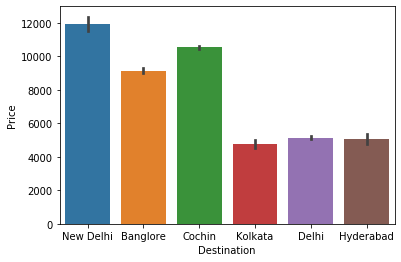

In [256]:
sns.barplot(df_train.Destination,df_train.Price)

(array([6.029e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <a list of 10 Patch objects>)

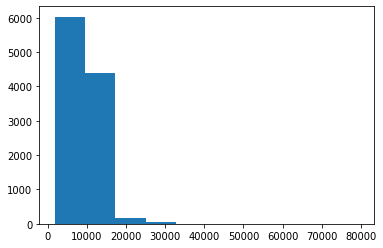

In [257]:
plt.hist(df_train.Price)

In [258]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Month            10683 non-null  int64 
 7   Day              10683 non-null  int64 
 8   Dep_hours        10683 non-null  int64 
 9   Dep_minutes      10683 non-null  int64 
 10  Arrival_hour     10683 non-null  int64 
 11  Arrival_minute   10683 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 1001.7+ KB


In [259]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Month', 'Day', 'Dep_hours', 'Dep_minutes', 'Arrival_hour',
       'Arrival_minute'],
      dtype='object')

In [260]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [261]:
df_train.Airline=le.fit_transform(df_train.Airline)
df_test.Airline=le.fit_transform(df_test.Airline)

In [262]:
df_train.Source=le.fit_transform(df_train.Source)
df_test.Source=le.fit_transform(df_test.Source)

In [263]:
df_train.Destination=le.fit_transform(df_train.Destination)
df_test.Destination=le.fit_transform(df_test.Destination)

In [264]:
df_train.Additional_Info=le.fit_transform(df_train.Additional_Info)
df_test.Additional_Info=le.fit_transform(df_test.Additional_Info)

In [265]:
df_train.Total_Stops=df_train.Total_Stops.astype('str')
df_test.Total_Stops=df_test.Total_Stops.astype('str')

In [266]:
df_train.Total_Stops=le.fit_transform(df_train.Total_Stops)
df_test.Total_Stops=le.fit_transform(df_test.Total_Stops)

In [267]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day,Dep_hours,Dep_minutes,Arrival_hour,Arrival_minute
0,3,0,5,5,8,3897,3,24,22,20,1,10
1,1,3,0,1,8,7662,1,5,5,50,13,15
2,4,2,1,1,8,13882,9,6,9,25,4,25
3,3,3,0,0,8,6218,12,5,18,5,23,30
4,3,0,5,0,8,13302,1,3,16,50,21,35


In [268]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Month,Day,Dep_hours,Dep_minutes,Arrival_hour,Arrival_minute
0,4,2,1,0,5,6,6,17,30,4,25
1,3,3,0,0,5,12,5,6,20,10,20
2,4,2,1,0,3,5,21,19,15,19,0
3,6,2,1,0,5,5,21,8,0,21,0
4,0,0,2,4,5,6,24,23,55,2,45


# Correlation

In [269]:
df_train.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day,Dep_hours,Dep_minutes,Arrival_hour,Arrival_minute
Airline,1.000000,-0.013401,0.018479,0.046130,-0.060802,-0.039520,-0.007918,0.031218,-0.035194,-0.060044,-0.007491,-0.071089
Source,-0.013401,1.000000,-0.592574,-0.227074,-0.022107,0.015998,0.063052,0.007560,0.059044,-0.056991,0.025632,0.021040
Destination,0.018479,-0.592574,1.000000,0.340446,0.026806,-0.071112,-0.105039,-0.052076,-0.072979,0.127892,-0.039710,0.017196
Total_Stops,0.046130,-0.227074,0.340446,1.000000,0.161728,-0.581863,-0.057892,0.043255,0.041088,0.046985,-0.093734,0.174542
Additional_Info,-0.060802,-0.022107,0.026806,0.161728,1.000000,-0.065478,-0.009098,-0.019456,-0.051010,-0.019339,0.026173,0.041311
Price,-0.039520,0.015998,-0.071112,-0.581863,-0.065478,1.000000,0.010700,-0.165412,0.006819,-0.024492,0.024264,-0.086155
Month,-0.007918,0.063052,-0.105039,-0.057892,-0.009098,0.010700,1.000000,-0.264899,0.028180,0.002152,-0.004338,-0.025786
Day,0.031218,0.007560,-0.052076,0.043255,-0.019456,-0.165412,-0.264899,1.000000,-0.002251,-0.016521,-0.002124,-0.021424
Dep_hours,-0.035194,0.059044,-0.072979,0.041088,-0.051010,0.006819,0.028180,-0.002251,1.000000,-0.024806,0.005215,0.067909
Dep_minutes,-0.060044,-0.056991,0.127892,0.046985,-0.019339,-0.024492,0.002152,-0.016521,-0.024806,1.000000,0.043054,-0.017594


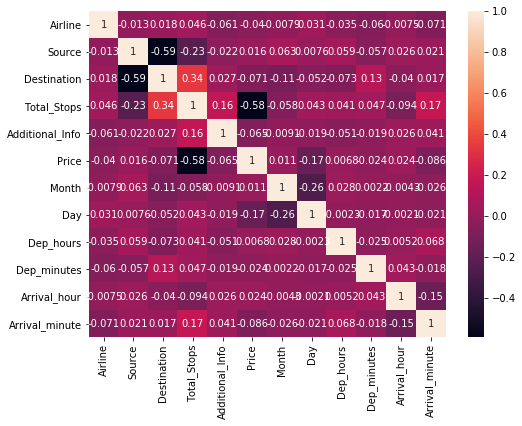

In [270]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(),annot=True)

in the correlation we can see the relationship between the variables.......here we can see the price of the flight is related with the other variables........some variables affects it positively and some negatively

# Setting x an y variable

In [271]:
x=df_train.drop('Price',axis=1)
x.shape

(10683, 11)

In [272]:
y=df_train['Price']
y.shape

(10683,)

# Standardscaler

In [273]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [274]:
x.shape

(10683, 11)

# Regression Process

In [275]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [276]:
def max_r2_score(rgr,x,y):
    max_score=0
    for r in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r)
        rgr.fit(x_train,y_train)
        pred=rgr.predict(x_test)
        r_sc=r2_score(y_test,pred)
        if r_sc>max_score:
            max_score=r_sc
            r_state=r
            
    print('max score at random_state of',r_state,'is',max_score)
    return r_state

In [277]:
lr=LinearRegression()
sc=max_r2_score(lr,x,y)

max score at random_state of 77 is 0.43390882177869106


In [278]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=47)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [279]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.4045301835827182


RMSE 3463.7139338686225


In [280]:
score=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.38314675 0.38788497 0.39431957 0.38510494 0.35866732]
0.38182470957357495
0.01217883892301662


In [281]:
p=lr.predict(df_test)
p

array([ 5839.88581747,  1850.43748953, -6182.62676968, ...,
        7461.45787649,  5209.5838489 , -6757.19689406])

In [282]:
lr_score=r2_score(y_test,pred),cross_val_score(lr,x,y,cv=5).mean()

# Lasso

In [283]:
from sklearn.linear_model import Lasso
lsr=Lasso()
pr={'alpha':[.0001,.001,.01,.1,1]}
gs=GridSearchCV(lsr,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'alpha': 1}

In [284]:
lsr=Lasso(alpha=.0001)
sc=max_r2_score(lsr,x,y)

max score at random_state of 77 is 0.43390882173428735


In [285]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=47)
lsr.fit(x_train,y_train)
pred=lsr.predict(x_test)

In [286]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.4045301858294178


RMSE 3463.713927334349


In [287]:
score=cross_val_score(lsr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.38314674 0.38788497 0.39431957 0.38510494 0.35866733]
0.3818247104418212
0.012178837785449623


In [288]:
p=lsr.predict(df_test)
p

array([ 5839.88616013,  1850.43986695, -6182.62273412, ...,
        7461.45956436,  5209.58435614, -6757.18866515])

In [289]:
lsr_score=r2_score(y_test,pred),cross_val_score(lsr,x,y,cv=5).mean()

# KNeighborsClassifier

In [290]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
pr={'n_neighbors':range(1,30)}
gs=GridSearchCV(knn,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 3}

In [291]:
#taking odd no as n_neighbors
knn=KNeighborsRegressor(n_neighbors=3)
sc=max_r2_score(knn,x,y)

max score at random_state of 77 is 0.7864545666312898


In [292]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [293]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.7864545666312898


RMSE 2024.1050396694961


In [294]:
score=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.7207514  0.74385392 0.72163961 0.72419975 0.6613081 ]
0.714350557452984
0.0278390299769359


In [295]:
p=knn.predict(df_test)
p

array([ 9915.66666667, 10027.        ,  4683.        , ...,
        9915.66666667,  4698.66666667,  5195.66666667])

In [296]:
knn_score=r2_score(y_test,pred),cross_val_score(knn,x,y,cv=5).mean()

# GradientBoostingRegressor

In [297]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
pr={'learning_rate':[.0001,.001,.01,.1,1],'n_estimators':[10,50,100,150,200,250,300]}
gs=GridSearchCV(gb,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [298]:
gb=GradientBoostingRegressor(learning_rate=1,n_estimators=300)
sc=max_r2_score(gb,x,y)

max score at random_state of 77 is 0.9037432742308243


In [299]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=47)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)

In [300]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.8599267719232284


RMSE 1679.924288059762


In [301]:
score=cross_val_score(gb,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.87473557 0.8607419  0.82698238 0.88057913 0.87073499]
0.8627547937189808
0.019019183797627844


In [302]:
p=lr.predict(df_test)
print(p)

[ 5839.88581747  1850.43748953 -6182.62676968 ...  7461.45787649
  5209.5838489  -6757.19689406]


In [303]:
gb_score=r2_score(y_test,pred),cross_val_score(gb,x,y,cv=5).mean()

# Model Selection

In [304]:
data={'linear':lr_score,'lasso':lsr_score,'kneighbors':knn_score,'GradientBoostingRegressor':gb_score}

In [305]:
selection=pd.DataFrame(data,index=['r2_score','cross_val_score'])

In [306]:
selection

,linear,lasso,kneighbors,GradientBoostingRegressor
r2_score,0.404530,0.404530,0.786455,0.859927
cross_val_score,0.381825,0.381825,0.714351,0.862668


In [307]:
from sklearn.externals import joblib

In [308]:
joblib.dump(gb,'gradient_model_flight_price_dataset.obj')

['gradient_model_flight_price_dataset.obj']

# model on testing dataset

In [309]:
x_train=df_train.drop('Price',axis=1)
x_train.shape

(10683, 11)

In [310]:
y_train=df_train['Price']
y_train.shape

(10683,)

In [311]:
x_test=df_test
x_test.shape

(2671, 11)

# linear regression

In [312]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [313]:
y_pred=lr.predict(x_test)

In [314]:
lr.score(x_train,y_train)

0.38364596674660245

In [323]:
a=pd.DataFrame((y_pred))

In [324]:
print(a)

                 0
0      9872.223635
1      1668.686507
2     21964.495465
3      8859.045961
4      4369.789486
...            ...
2666   8264.325585
2667   2193.914270
2668  14418.283538
2669   8793.608155
2670   7803.422291

[2671 rows x 1 columns]


# gradienboostingregressor

In [317]:
gb=GradientBoostingRegressor(learning_rate=1,n_estimators=300)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(y_pred)


[ 9872.22363471  1668.68650693 21964.49546458 ... 14418.28353761
  8793.60815526  7803.4222914 ]


In [318]:
result=(y_pred)
df=pd.DataFrame(result)

In [319]:
gb.score(x_train,y_train)

0.9313182690474093

In [325]:
df.to_csv('pred_y_flight_price.csv')

In [321]:
df

,0
0,9872.223635
1,1668.686507
2,21964.495465
3,8859.045961
4,4369.789486
...,...
2666,8264.325585
2667,2193.914270
2668,14418.283538
2669,8793.608155


In [322]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64